In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start ='2022-01-01'
end = '2022-12-01'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838226
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.291183


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-21,158.740005,153.600006,157.339996,153.720001,101696800.0,153.720001
2022-09-22,154.470001,150.910004,152.380005,152.740005,86652500.0,152.740005
2022-09-23,151.470001,148.559998,151.190002,150.429993,95939200.0,150.429993
2022-09-26,153.770004,149.639999,149.660004,150.770004,93235300.0,150.770004
2022-09-27,154.690002,152.699997,152.740005,152.720001,14900951.0,152.720001


In [8]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838226
1,2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.259933
2,2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,178.959457
3,2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.199142
4,2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.291183


In [9]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,179.229996,177.259995,178.089996,177.570007,64062300.0
1,182.880005,177.710007,177.830002,182.009995,104487900.0
2,182.940002,179.119995,182.630005,179.699997,99310400.0
3,180.169998,174.639999,179.610001,174.919998,94537600.0
4,175.300003,171.639999,172.699997,172.000000,96904000.0


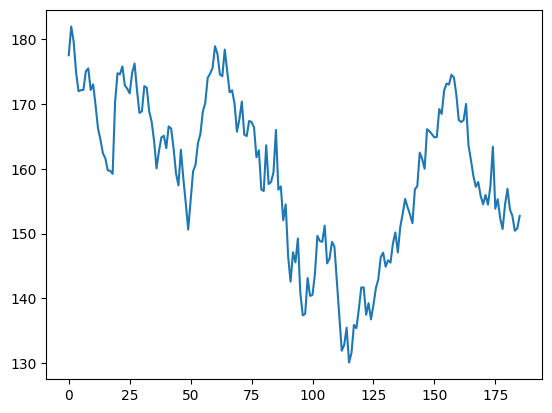

In [10]:
plt.plot(df.Close)

In [11]:
df


,High,Low,Open,Close,Volume
0,179.229996,177.259995,178.089996,177.570007,64062300.0
1,182.880005,177.710007,177.830002,182.009995,104487900.0
2,182.940002,179.119995,182.630005,179.699997,99310400.0
3,180.169998,174.639999,179.610001,174.919998,94537600.0
4,175.300003,171.639999,172.699997,172.000000,96904000.0
...,...,...,...,...,...
181,158.740005,153.600006,157.339996,153.720001,101696800.0
182,154.470001,150.910004,152.380005,152.740005,86652500.0
183,151.470001,148.559998,151.190002,150.429993,95939200.0
184,153.770004,149.639999,149.660004,150.770004,93235300.0


In [12]:
ma100=df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
181    152.1907
182    152.1416
183    152.0663
184    151.9792
185    151.8462
Name: Close, Length: 186, dtype: float64

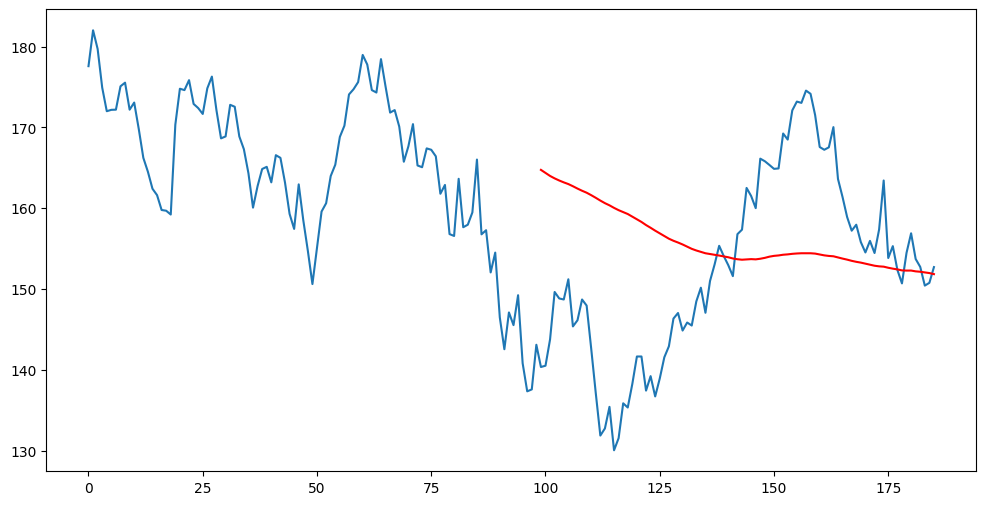

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
181   NaN
182   NaN
183   NaN
184   NaN
185   NaN
Name: Close, Length: 186, dtype: float64

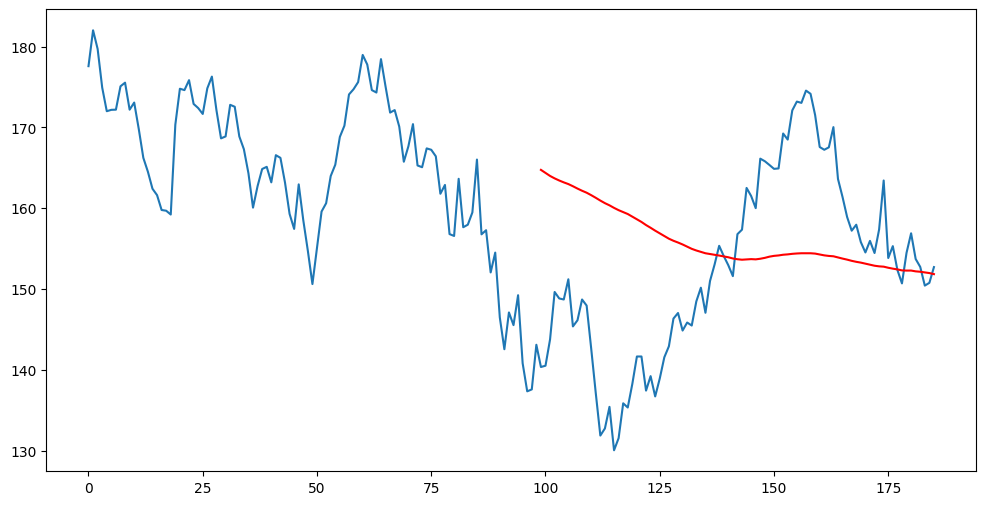

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(186, 5)

In [17]:
data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(130, 1)
(56, 1)


In [18]:
data_training.head()

,Close
0,177.570007
1,182.009995
2,179.699997
3,174.919998
4,172.000000


In [19]:
data_testing.head()

,Close
130,144.869995
131,145.860001
132,145.490005
133,148.470001
134,150.169998


In [20]:
# scaling down data in 0,1 scale 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.91453345],
       [1.        ],
       [0.95553421],
       [0.86352268],
       [0.80731482],
       [0.81058716],
       [0.81097223],
       [0.86660264],
       [0.87526475],
       [0.81097223],
       [0.82791169],
       [0.76496646],
       [0.6962464 ],
       [0.66313761],
       [0.6227143 ],
       [0.60750721],
       [0.5720886 ],
       [0.57035624],
       [0.56130905],
       [0.77516856],
       [0.86082779],
       [0.85755545],
       [0.88123198],
       [0.82463905],
       [0.81482203],
       [0.80077014],
       [0.86179032],
       [0.88970171],
       [0.80962464],
       [0.74263723],
       [0.74725716],
       [0.82252162],
       [0.81790198],
       [0.74725716],
       [0.71684327],
       [0.6594805 ],
       [0.57767106],
       [0.6290666 ],
       [0.66968259],
       [0.67487968],
       [0.6379211 ],
       [0.70259869],
       [0.6962464 ],
       [0.63734365],
       [0.56284903],
       [0.52704536],
       [0.63310878],
       [0.547

In [22]:
data_training_array.shape

(130, 1)

In [23]:

x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
  
x_train, y_train = np.array(x_train),np.array(y_train)   

In [24]:
x_train.shape

(30, 100, 1)

In [25]:
# ML Model


In [26]:
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))





model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))





model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


# dense layer
model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0599
Epoch 2/50
1/1 [==============================] - 0s 156ms/step - loss: 0.0550
Epoch 3/50
1/1 [==============================] - 0s 158ms/step - loss: 0.0501
Epoch 4/50
1/1 [==============================] - 0s 155ms/step - loss: 0.0449
Epoch 5/50
1/1 [==============================] - 0s 151ms/step - loss: 0.0391
Epoch 6/50
1/1 [==============================] - 0s 150ms/step - loss: 0.0322
Epoch 7/50
1/1 [==============================] - 0s 151ms/step - loss: 0.0257
Epoch 8/50
1/1 [==============================] - 0s 153ms/step - loss: 0.0166
Epoch 9/50
1/1 [==============================] - 0s 149ms/step - loss: 0.0108
Epoch 10/50
1/1 [==============================] - 0s 140ms/step - loss: 0.0180
Epoch 11/50
1/1 [==============================] - 0s 139ms/step - loss: 0.0255
Epoch 12/50
1/1 [==============================] - 0s 140ms/step - loss: 0.0169
Epoch 13/50
1/1 [==============================] - 0

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()


,Close
130,144.869995
131,145.860001
132,145.490005
133,148.470001
134,150.169998


In [32]:
data_training.tail(100)

,Close
30,168.880005
31,172.789993
32,172.550003
33,168.880005
34,167.300003
...,...
125,138.929993
126,141.559998
127,142.919998
128,146.350006


In [33]:
past_100_days= data_training.tail(100)

In [47]:
final_df = past_100_days.append(data_testing,ignore_index = True)

C:\Users\maris_q3mm6nk\AppData\Local\Temp\ipykernel_21412\1195911748.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [48]:
final_df.head()

,Close
0,168.880005
1,172.789993
2,172.550003
3,168.880005
4,167.300003


In [49]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.79386503],
       [0.87382388],
       [0.86891611],
       [0.79386503],
       [0.76155416],
       [0.70061357],
       [0.61370152],
       [0.6683027 ],
       [0.71145198],
       [0.71697323],
       [0.67770947],
       [0.74642113],
       [0.73967263],
       [0.677096  ],
       [0.59795501],
       [0.5599182 ],
       [0.672597  ],
       [0.58200412],
       [0.50449885],
       [0.42044977],
       [0.51186082],
       [0.60388534],
       [0.62494871],
       [0.69366036],
       [0.7222904 ],
       [0.79263809],
       [0.82106343],
       [0.90000003],
       [0.91329234],
       [0.93128834],
       [1.        ],
       [0.97566458],
       [0.91104284],
       [0.90490781],
       [0.98936597],
       [0.92024523],
       [0.85419216],
       [0.86053157],
       [0.81860923],
       [0.72985676],
       [0.76891614],
       [0.82494865],
       [0.72044968],
       [0.71595099],
       [0.76359896],
       [0.76012252],
       [0.74355816],
       [0.648

In [50]:
input_data.shape

(156, 1)

In [51]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(56, 100, 1)
(56,)


In [53]:
# making predictions

y_predicted = model.predict(x_test)

2/2 [==============================] - 0s 42ms/step


In [54]:
y_predicted.shape

(56, 1)

In [55]:
y_test


array([0.30286288, 0.32310839, 0.31554203, 0.37648262, 0.41124738,
       0.3478529 , 0.42822083, 0.46993847, 0.51717799, 0.49141093,
       0.46809806, 0.44049089, 0.54662558, 0.55807778, 0.663599  ,
       0.6431491 , 0.61247426, 0.73762782, 0.73108371, 0.72167693,
       0.71186076, 0.71288331, 0.80122701, 0.78588959, 0.85971372,
       0.88200402, 0.87873197, 0.90981589, 0.90163575, 0.84785274,
       0.76707572, 0.76012252, 0.76625755, 0.81738229, 0.68629839,
       0.64049083, 0.58997956, 0.55541919, 0.57055223, 0.52658477,
       0.50040893, 0.52965244, 0.4989776 , 0.55848655, 0.68241286,
       0.48629845, 0.51635982, 0.45623708, 0.4220858 , 0.49938637,
       0.54887508, 0.48384457, 0.46380376, 0.41656424, 0.42351744,
       0.46339467])

In [56]:
y_predicted

array([[0.19888762],
       [0.19864863],
       [0.19861814],
       [0.19878384],
       [0.19913757],
       [0.199676  ],
       [0.20038083],
       [0.20124081],
       [0.20225298],
       [0.2034234 ],
       [0.20474939],
       [0.20621416],
       [0.20778506],
       [0.20944765],
       [0.21119401],
       [0.21303856],
       [0.21499619],
       [0.21706915],
       [0.21926749],
       [0.22159807],
       [0.22405574],
       [0.22662082],
       [0.22926658],
       [0.23198134],
       [0.23475176],
       [0.23757794],
       [0.24046487],
       [0.24341176],
       [0.2464171 ],
       [0.24947065],
       [0.25254136],
       [0.25557068],
       [0.25849313],
       [0.26125097],
       [0.2638123 ],
       [0.26613137],
       [0.2681591 ],
       [0.26984543],
       [0.27114737],
       [0.2720431 ],
       [0.27252296],
       [0.2725883 ],
       [0.27226222],
       [0.2715766 ],
       [0.27058542],
       [0.26937956],
       [0.26801354],
       [0.266

In [57]:
scaler.scale_

array([0.02044989])

In [58]:
scale_factor = 1/0.02099517
y_predicted =y_predicted*scale_factor
y_test =y_test*scale_factor

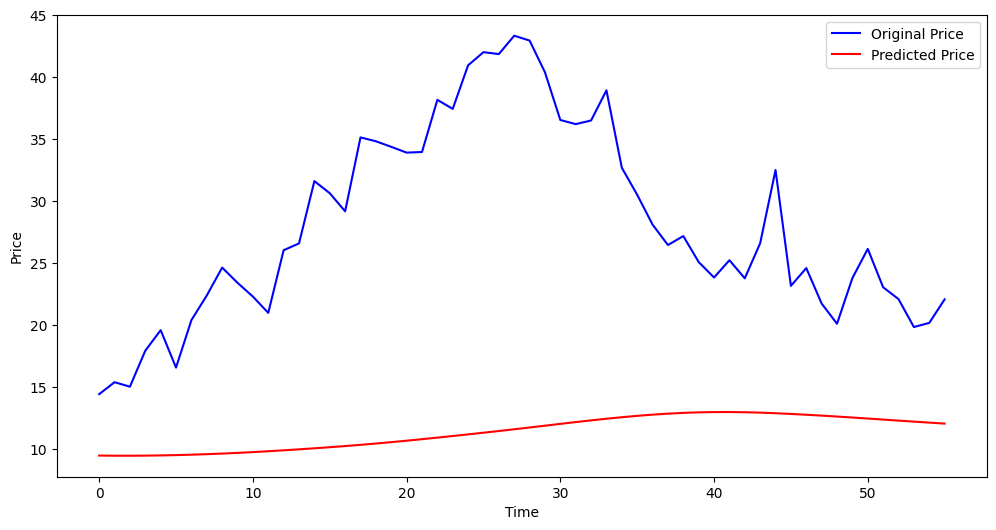

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()